<a href="https://colab.research.google.com/github/nopuli265/DataScience/blob/main/Amazon_Alexa_Review_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
# it's a large amount of dataset so we import ot throught colab

a= files.upload()

Saving amazon_alexa.tsv to amazon_alexa.tsv


# step 1: convert object class into integer
* a) Verified_reviews
* b) Variety of products

# step 2: i have 2 numerical inputs
* ratings
* feedback

# step 3: drop the date & time from our dataset because it will be of no use while prdicting the output 

# step 4: perform NLP on the object types to convert it into type integer 

# step 5: create a model to perdict the review of the particular product (True or False)


# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data= pd.read_csv("amazon_alexa.tsv", sep='\t')
data.head(7)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1


# PERFORMING EDA ON THE DATASET

In [4]:
columns=[]
for i in data.columns:
  columns.append(i)
columns

['rating', 'date', 'variation', 'verified_reviews', 'feedback']

In [5]:
# the unique values that are present in each of our columns
#shape of our dataset
data.shape


(3150, 5)

In [6]:
for i in columns: 
  print ('number of unique values in ' ,i, 'is = ', len(np.unique(data[i])))

number of unique values in  rating is =  5
number of unique values in  date is =  77
number of unique values in  variation is =  16
number of unique values in  verified_reviews is =  2301
number of unique values in  feedback is =  2


In [7]:
# check null value

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [8]:
data.describe()
# it shows about the numerical values

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [10]:
data.drop(labels='date', axis=1, inplace=True)

In [11]:
data.head(5)

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [12]:
from sklearn.preprocessing import LabelEncoder
data['variation']=LabelEncoder().fit_transform(data['variation'])

In [13]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1
3,5,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,5,Music,1


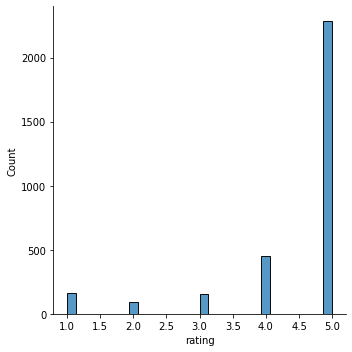

In [14]:
# how data distributed in the dataset
sns.displot(data, x='rating', legend=True)

the most given ratings to the products is five because it has a value more than 2000 which it can analyze using this graph
the second most given rating is 4.2
next is 3.2 and the min ratings that is given to a product is 2.0 while 1.0 is more than 2.2


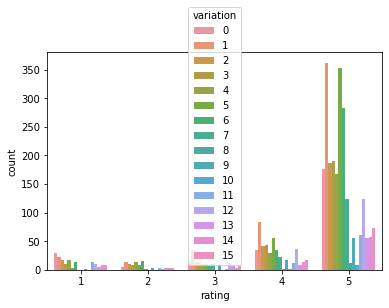

In [15]:
# how the ratings are distributed on the basis of different products
#need to be plotted is rating on the dasis of variation

sns.countplot(x='rating', hue='variation', data=data)

in each rating you can see all these 15  values are present. that means all these 15 product s has given one, two, three, four, five ratings on the basis of this graph.

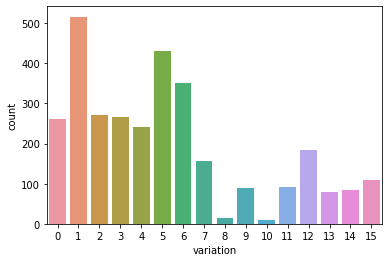

In [16]:
#how many variations of products we have in our data set
sns.countplot(x='variation', data=data)

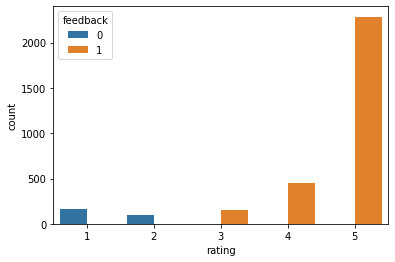

In [17]:
#how the feedbacks are distributed on the basis of our ratings
sns.countplot(x='rating', hue='feedback', data=data)


0 for negative
1 for positive
 you can see the products that have given negative feedback has 1 to 2 ratings and not more than 2 rating
 the products that have given positive feedback lies 3, 4 and 5 ratings.

 => from that idea you can see your model should be trained on the process that if a product has a rating more than 3 then it should be marked as a good product
 and less then 2 then it should be marked as a bad product




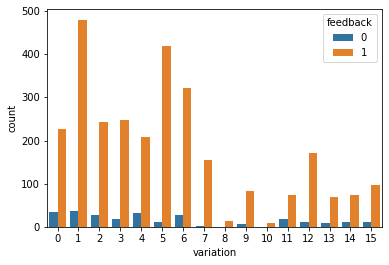

In [18]:
# create a countplot on the variations of the data.
# that is how many times the products are varied on the basis of our feedback

sns.countplot(x='variation', hue='feedback', data=data)

we have an idea how our feedback is given, how our feedback is given on the basis of the ratings, how our feedback is given on the vasis of our programmes

we are just going to now drop the ratings and variations of product from our dataset because we just perform the pre-processing on the text and then we are going to predict our feedback

In [19]:
data.drop(labels=['variation','rating'], axis=1, inplace=True)

In [20]:
data.head()


,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [21]:
# what is the precentage of positive and negative feedback in our dataset?

total_value= len(data['feedback'])
positive_comment=[]
negative_comment = []

for i in data ['feedback']:
  if i == 1: 
    positive_comment.append(data['feedback'])
  else:
    negative_comment.append(data['feedback'])

print(len(positive_comment),len(negative_comment))
percent_of_positive_comment= (len(positive_comment)/total_value)*100
percent_of_negative_comment= (len(negative_comment)/total_value)*100

print('percentage of positive comment =', percent_of_positive_comment,'%')
print('percentage of negative comment =', percent_of_negative_comment,'%')

2893 257
percentage of positive comment = 91.84126984126985 %
percentage of negative comment = 8.158730158730158 %


that means most of the persons has given their positive comments to this dataset

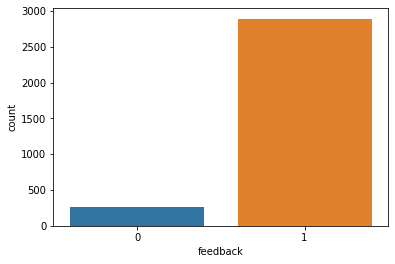

In [22]:
sns.countplot(x='feedback', data=data)

# PREDICTING THE FEEDBACK TO OWN COMMENT


In [23]:
data.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [24]:
x=data['verified_reviews']
y=data['feedback']

#perform NLP

In [25]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [26]:
tokenizer = Tokenizer(15211, lower=True,oov_token='UNK')
tokenizer.fit_on_texts(x)

In [27]:
#convert them into sequence by using the predefined function tokenizer.text_to_sequences
x=tokenizer.texts_to_sequences(x)

In [28]:
from keras.preprocessing.sequence import pad_sequences


In [29]:
x_pad = pad_sequences(x, maxlen=80, padding ='post')
x_pad[0]

array([11,  8, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

11 = love
8= my
12= echo
77 number 0 because we have maxlen=80

In [30]:
#splitting our dataset into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.33, random_state=42)

we will train our data on the basis and then we are going to validate it according to our test data


In [31]:
# implement this using a supervised machine learing technique that is RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [32]:
randomforest_classifier = RandomForestClassifier(n_estimators=25, criterion='entropy', class_weight= { 0:6, 1:1})
randomforest_classifier.fit(x_train, y_train)
Y_train_predict = randomforest_classifier.predict(x_train)
Y_predict= randomforest_classifier.predict(x_test)

In [33]:
Y_train_predict[0]

1

In [34]:
Y_predict[0]

1

In [35]:

x[0]

[11, 8, 12]

In [36]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,Y_predict))

0.9115384615384615


generalised accuracy lies between 85 to 100% (độ chính xác tổng  quát nằm trong khoangr)

# Plotting the output

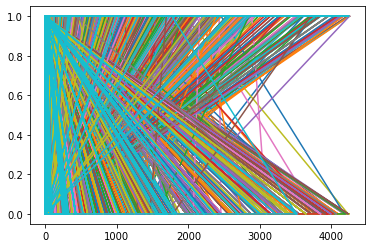

In [37]:
plt.plot(x_train, randomforest_classifier.predict(x_train))
plt.show()

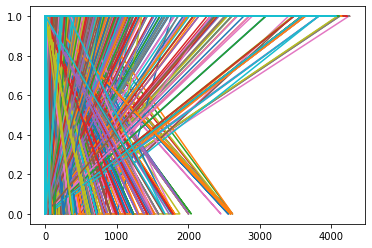

In [38]:
plt.plot(x_test, randomforest_classifier.predict(x_test))
plt.show()

we have plotted the same graph for the test dataset and you can see it has the similar output so that means our train modek matches with our test model which gives us an accuracy of 90,7%

In [39]:
def review_bot(feedback):
  sentence_lst=[]
  sentence_lst.append(feedback)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq, maxlen=80, padding='post')
  ans= randomforest_classifier.predict(sentence_padded)

  if ans.all() == 1:
    print('positive feedback')
  else:
    print('negative feedback')

In [41]:
review_bot(str(input('Enter a review: ')))

Enter a review: it is pretty good
positive feedback
